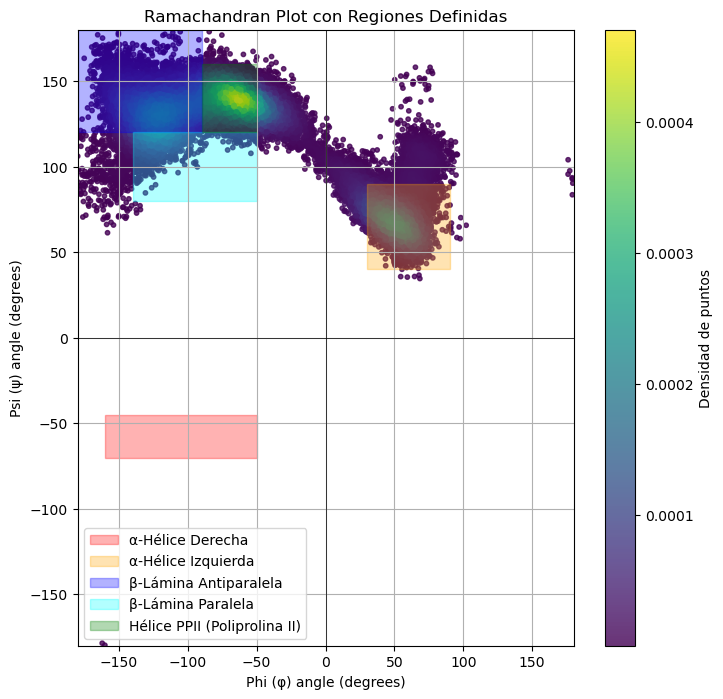

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.patches import Polygon

# Cargar los datos
data = np.loadtxt('ala-2.dat')
phi = data[:, 1]  # Ángulos phi
psi = data[:, 2]  # Ángulos psi

# Calcular la densidad de puntos
xy = np.vstack([phi, psi])
z = gaussian_kde(xy)(xy)

# Crear el gráfico de dispersión con colores según la densidad
plt.figure(figsize=(8, 8))
plt.scatter(phi, psi, c=z, s=10, cmap='viridis', alpha=0.8)
plt.colorbar(label='Densidad de puntos')  # Barra de color para la densidad

# Definir las regiones clásicas de Ramachandran

# α-Hélice Derecha (Right-handed Alpha Helix)
alpha_helix_right = np.array([
    [-160, -45], [-50, -45], [-50, -70], [-160, -70], [-160, -45]
])

# α-Hélice Izquierda (Left-handed Alpha Helix)
alpha_helix_left = np.array([
    [30, 40], [90, 40], [90, 90], [30, 90], [30, 40]
])

# β-Lámina Antiparalela
beta_sheet_antiparallel = np.array([
    [-180, 120], [-180, 180], [-90, 180], [-90, 120], [-180, 120]
])

# β-Lámina Paralela
beta_sheet_parallel = np.array([
    [-140, 80], [-140, 120], [-50, 120], [-50, 80], [-140, 80]
])

# Hélice PPII (Poliprolina II) - Región Giroidal
ppii_helix = np.array([
    [-90, 120], [-90, 160], [-50, 160], [-50, 120], [-90, 120]
])

# Añadir las regiones al gráfico con mayor transparencia
plt.gca().add_patch(Polygon(alpha_helix_right, closed=True, color='red', alpha=0.3, label='α-Hélice Derecha'))
plt.gca().add_patch(Polygon(alpha_helix_left, closed=True, color='orange', alpha=0.3, label='α-Hélice Izquierda'))
plt.gca().add_patch(Polygon(beta_sheet_antiparallel, closed=True, color='blue', alpha=0.3, label='β-Lámina Antiparalela'))
plt.gca().add_patch(Polygon(beta_sheet_parallel, closed=True, color='cyan', alpha=0.3, label='β-Lámina Paralela'))
plt.gca().add_patch(Polygon(ppii_helix, closed=True, color='green', alpha=0.3, label='Hélice PPII (Poliprolina II)'))

# Personalizar el gráfico
plt.title('Ramachandran Plot con Regiones Definidas')
plt.xlabel('Phi (φ) angle (degrees)')
plt.ylabel('Psi (ψ) angle (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()
